# APPL Stock Price Prediction Using Different Machine Learning Models and Compare the Performance of the Models

# Bayesian Ridge Regression 

Bayesian regression allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates.

# Import Libraries

In [260]:
# yahoo_finance is used to fetch data 
!pip install yfinance

In [261]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data into the Data Frame

In [262]:
# input
symbol = 'AAPL'
start = '1980-01-01'
end = '2023-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600


# Data Preprocessing

In [263]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800,0,0,0,-0.052171
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000,0,1,1,-0.073398
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600,0,1,1,0.024751
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600,0,1,1,0.028993
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097987,48630400,0,1,1,0.061028


In [264]:
#View Dataset
dataset

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800,0,0,0,-0.052171
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000,0,1,1,-0.073398
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600,0,1,1,0.024751
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600,0,1,1,0.028993
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097987,48630400,0,1,1,0.061028
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,1,1,0,-0.002798
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,1,0,0,-0.013878
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,0,0,1,-0.030685


# Dataset Cleaning and Null Value Testing

In [265]:
# See how many null values in each column

dataset.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
dtype: int64

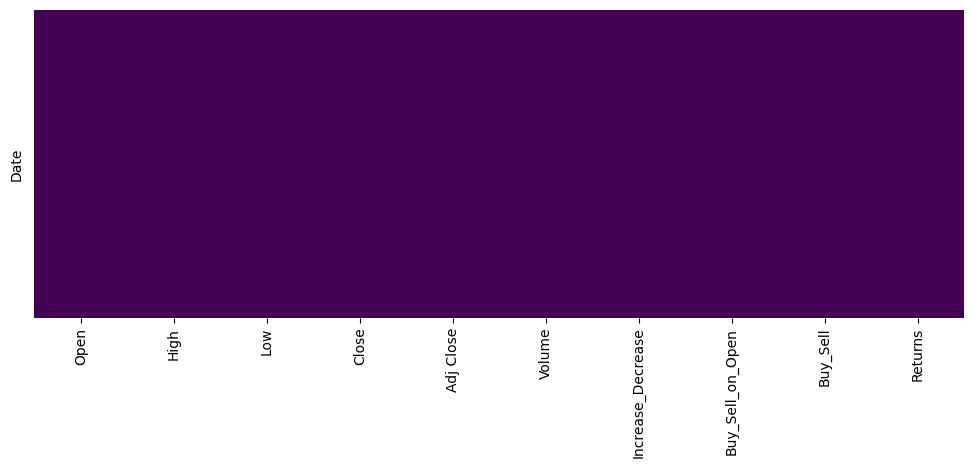

In [266]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# Analyze the Data

In [267]:
# see number of rows, number of columns
dataset.shape

(10602, 10)

In [268]:
#TOTAL NUMBER OF RECORDS
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  106020


In [269]:
# see columns names

dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Returns'],
      dtype='object')

In [270]:
#View Data Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10602 entries, 1980-12-15 to 2022-12-30
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               10602 non-null  float64
 1   High               10602 non-null  float64
 2   Low                10602 non-null  float64
 3   Close              10602 non-null  float64
 4   Adj Close          10602 non-null  float64
 5   Volume             10602 non-null  int64  
 6   Increase_Decrease  10602 non-null  int32  
 7   Buy_Sell_on_Open   10602 non-null  int32  
 8   Buy_Sell           10602 non-null  int32  
 9   Returns            10602 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 786.9 KB


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Increase_Decrease'}>,
        <AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>],
       [<AxesSubplot:title={'center':'Returns'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

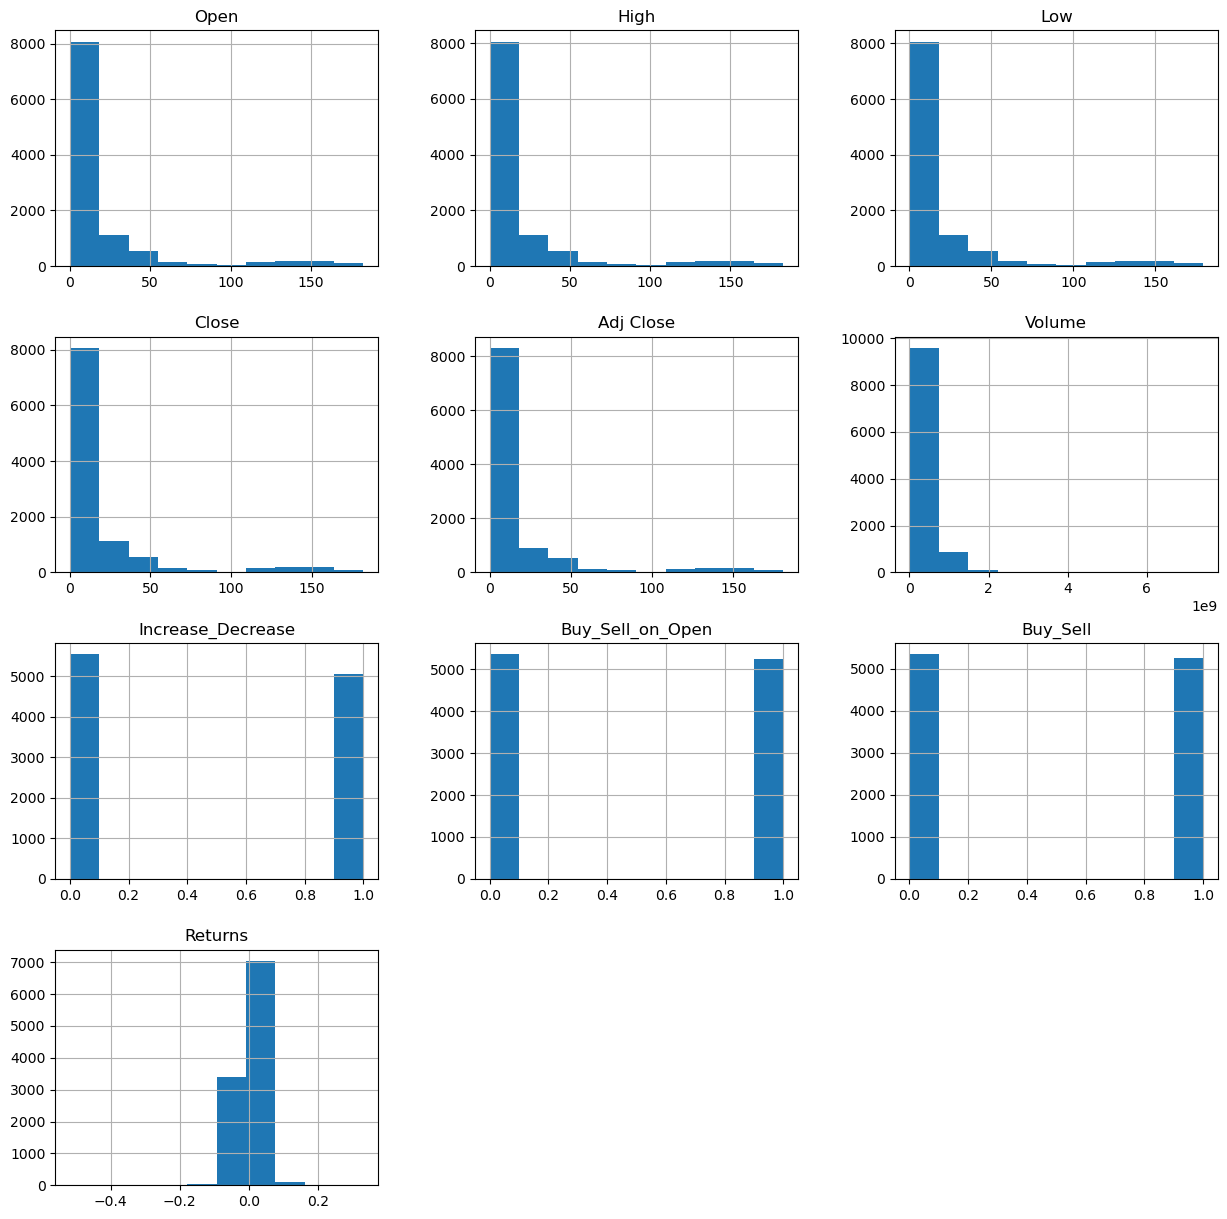

In [271]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [272]:
# The statistics per each column

dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,10602.000000,10602.000000,10602.000000,10602.000000,10602.000000,1.060200e+04,10602.000000,10602.000000,10602.000000,10602.000000
mean,16.470998,16.658052,16.284922,16.477925,15.783397,3.276539e+08,0.477080,0.495095,0.496227,0.001083
std,35.131697,35.556418,34.715065,35.150839,34.771360,3.378635e+08,0.499498,0.500000,0.500009,0.028281
min,0.049665,0.049665,0.049107,0.049107,0.038154,0.000000e+00,0.000000,0.000000,0.000000,-0.518692
25%,0.287338,0.294643,0.280759,0.287338,0.237186,1.213772e+08,0.000000,0.000000,0.000000,-0.013110
50%,0.486607,0.493304,0.477679,0.486049,0.402153,2.146984e+08,0.000000,0.000000,0.000000,0.000000
75%,16.130179,16.309196,15.966607,16.095179,13.897880,4.067266e+08,1.000000,1.000000,1.000000,0.014707
max,182.630005,182.940002,179.119995,182.009995,180.683868,7.421641e+09,1.000000,1.000000,1.000000,0.332281


# Define X and Y

In [273]:
X = dataset['Open'].values.reshape(10602,-1)
y = dataset['Adj Close'].values.reshape(10602,-1)

In [274]:
from sklearn.linear_model import BayesianRidge, LinearRegression

# Fit the Bayesian Ridge Regression and an OLS for comparison
model = BayesianRidge(compute_score=True)
model.fit(X, y)

BayesianRidge(compute_score=True)

In [275]:
model.coef_

array([0.98929718])

In [276]:
model.scores_

array([-47376.31166408, -15505.79437194, -15505.7943717 ])

# Split Train Data and Test Data

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Dataset Traning and Model Traning

In [279]:
model = BayesianRidge(compute_score=True)
model.fit(X_train, y_train)

BayesianRidge(compute_score=True)

In [280]:
model.coef_

array([0.99000429])

In [281]:
model.scores_

array([-37966.23255919, -12529.4413924 , -12529.44139195])

# Comparison of Actual Values and Predicted Values

In [282]:
y_pred = model.predict(X_test)

# Accuracy and Loss Function Values of the Model

In [283]:
from sklearn import metrics
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error(MAE): 0.7301219165571058
Mean_Squared_Error(MSE): 0.9639571485960136
Root_Mean_Squared_Error(RMSE): 0.9818131943480968


In [284]:
print('Accuracy Score:', model.score(X_test, y_test))

Accuracy Score: 0.9991484481836781
